In [1]:
#필요한 모듈 라이브러리를 불러온다.
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

#경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

#코드 숨기기
from IPython.display import HTML

#모델링
import statsmodels.formula.api as smf
import statsmodels.api as sm


Bad key text.latex.preview in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/kwak-yejin/opt/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, lin

# 데이터 전처리

In [2]:
result1 = pd.read_csv("data/result1_imputed.csv", sep=",")
result2 = pd.read_csv("data/result2_imputed.csv", sep=",")
result3 = pd.read_csv("data/result3_imputed.csv", sep=",")

In [3]:
result2.head()

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019.0,1.0,4.0,33.8,138.0,149.0,0.967958,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019.0,1.0,13.0,52.3,88.0,142.0,0.942045,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019.0,1.0,23.0,48.2,95.0,115.0,0.651839,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,21.4,56.5,42.0,22.5,23.6,75.0,15.0,162.5,1,2019.0,0.0,20.0,37.5,90.0,118.0,0.230760,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,20.5,49.8,23.0,16.0,33.6,70.0,16.4,155.7,1,2019.0,0.0,7.0,42.4,86.0,98.0,0.713805,4,2884336,본운동:동적 스트레칭 루틴프로그램


In [4]:
result2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117 entries, 0 to 11116
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    11117 non-null  float64
 1   Weight                 11117 non-null  float64
 2   age                    11117 non-null  float64
 3   bending_forward        11117 non-null  float64
 4   body_fat               11117 non-null  float64
 5   diastolic_bp           11117 non-null  float64
 6   grip_power             11117 non-null  float64
 7   height                 11117 non-null  float64
 8   label                  11117 non-null  int64  
 9   measure_time           11117 non-null  float64
 10  sex                    11117 non-null  float64
 11  sit_up                 11117 non-null  float64
 12  step_inspection        11117 non-null  float64
 13  step_recover_time      11117 non-null  float64
 14  systolic_bp            11117 non-null  float64
 15  sc

In [5]:
result2[result2["exercise_prescription"].isnull()].index

Int64Index([    9,    10,    23,    25,    29,    34,    38,    42,    48,
               55,
            ...
            11107, 11108, 11109, 11110, 11111, 11112, 11113, 11114, 11115,
            11116],
           dtype='int64', length=4002)

In [6]:
7115+1164

8279

In [7]:
result2 = result2.drop(result2[result2["exercise_prescription"].isnull()].index, axis=0)
result2 = result2.reset_index(drop=True)
result2

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019.0,1.0,4.0,33.800,138.000,149.0,0.967958,0,2884332,"본운동:한발 연속 뛰기,뒤꿈치 높이들어 뛰기,무릎 높이 들어 뛰기,점프하며 뛰기,메..."
1,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019.0,1.0,13.0,52.300,88.000,142.0,0.942045,1,2884333,"준비운동:정적 스트레칭 루틴프로그램,동적 스트레칭 루틴프로그램,몸통 들어올리기,팔..."
2,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019.0,1.0,23.0,48.200,95.000,115.0,0.651839,2,2884334,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:합장하여 앞으로 숙이기,허리숙여 양팔..."
3,21.4,56.5,42.0,22.5,23.6,75.0,15.0,162.5,1,2019.0,0.0,20.0,37.500,90.000,118.0,0.230760,3,2884335,"준비운동:전신 루틴 스트레칭,한발 앞으로 내밀고 앉았다 일어서기,서서 상체 일으키기..."
4,20.5,49.8,23.0,16.0,33.6,70.0,16.4,155.7,1,2019.0,0.0,7.0,42.400,86.000,98.0,0.713805,4,2884336,본운동:동적 스트레칭 루틴프로그램
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,19.6,50.1,21.0,-9.0,34.1,80.0,13.1,159.7,1,2020.0,0.0,14.0,46.632,65.513,120.0,0.864842,8273,2892605,준비운동:달리기
7111,28.7,80.4,21.0,-15.0,23.4,80.0,29.1,167.5,1,2020.0,1.0,34.0,44.033,110.310,120.0,0.860357,8274,2892606,"준비운동:줄넘기 운동,앉았다 일어서기,엉덩이 늘리기,짐볼 운동 루틴프로그램"
7112,17.3,42.3,21.0,4.0,23.4,80.0,22.0,156.5,1,2020.0,1.0,30.0,52.271,101.190,120.0,0.615504,8275,2892607,"준비운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭,유산소 운동..."
7113,22.8,52.6,20.0,-13.0,31.5,80.0,21.3,152.0,1,2020.0,1.0,46.0,47.256,115.080,120.0,0.686832,8276,2892608,"준비운동:무릎굽혀 원 그리기,네발 걷기,다리 들어올리기,고양이 자세,옆구리 스트레칭..."


In [8]:
result2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    7115 non-null   float64
 1   Weight                 7115 non-null   float64
 2   age                    7115 non-null   float64
 3   bending_forward        7115 non-null   float64
 4   body_fat               7115 non-null   float64
 5   diastolic_bp           7115 non-null   float64
 6   grip_power             7115 non-null   float64
 7   height                 7115 non-null   float64
 8   label                  7115 non-null   int64  
 9   measure_time           7115 non-null   float64
 10  sex                    7115 non-null   float64
 11  sit_up                 7115 non-null   float64
 12  step_inspection        7115 non-null   float64
 13  step_recover_time      7115 non-null   float64
 14  systolic_bp            7115 non-null   float64
 15  scor

In [9]:
for i in range(len(result2)):
    result2['exercise_prescription'][i] = result2['exercise_prescription'][i].replace(" " , "").replace("준비운동" , "준비운동").replace("/본운동" , "|본운동").replace("/마무리운동" , "|마무리운동")
    result2['exercise_prescription'][i] = result2['exercise_prescription'][i].replace("/" , "").replace("|" , "/")

In [10]:
num = list()
for i in range (len(result2)):
    num.append(len(result2['exercise_prescription'][i].replace(" " , "").split('/')))

In [11]:
set(num)

{1, 2, 3}

In [12]:
len(num)

7115

In [13]:
prepare = list()
main = list()
end = list()
for i in range (len(result2)):
    if len(result2['exercise_prescription'][i].replace(" " , "").split('/')) == 1:
        if result2['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            main.append([])
            end.append([])
        elif result2['exercise_prescription'][i].replace(" " , "").split('/')[0][:3] == '본운동':
            main.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            prepare.append([])
            end.append([])
        else:
            end.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
            prepare.append([])
            main.append([])

            
    if len(result2['exercise_prescription'][i].replace(" " , "").split('/')) == 2:
        if result2['exercise_prescription'][i].replace(" " , "").split('/')[0][:4] == '준비운동':
            prepare.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
            if result2['exercise_prescription'][i].replace(" " , "").split('/')[1][:3] == '본운동':
                main.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
                end.append([])
            else:
                end.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][6:].split(','))
                main.append([])
                
        else:
            main.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][4:].split(','))
            end.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[1][6:].split(','))
            prepare.append([])
            
    if len(result2['exercise_prescription'][i].replace(" " , "").split('/')) == 3:
        prepare.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[0][5:].split(','))
        main.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[1][4:].split(','))       
        end.append(result2['exercise_prescription'][i].replace(" " , "").split('/')[2][6:].split(','))

In [14]:
prepare

[[],
 ['정적스트레칭루틴프로그램',
  '동적스트레칭루틴프로그램',
  '몸통들어올리기',
  '팔굽혀펴기',
  '팔다리교차버티기',
  '윗몸일으키기',
  '앉았다일어서기',
  '버피테스트',
  '걷기',
  '조깅',
  '자전거타기'],
 ['동적스트레칭루틴프로그램'],
 ['전신루틴스트레칭', '한발앞으로내밀고앉았다일어서기', '서서상체일으키기', '엎드려버티기', '누워서엉덩이들어올리기', '팔굽혀펴기'],
 [],
 ['정적스트레칭루틴프로그램'],
 ['한발앞굽이팔위로뻗어가슴내밀기',
  '다리꼬아상체앞으로숙이기',
  '다리벌려옆으로상체숙이기',
  '다리모아상체숙이기',
  '다리벌려앞으로상체숙이기'],
 ['동적스트레칭루틴프로그램'],
 ['앉아서밴드잡고몸통돌리기', '밴드잡고몸통옆으로굽히기', '바벨들어올리기'],
 ['하지루틴스트레칭1', '상지루틴스트레칭'],
 ['다리벌려옆으로상체숙이기',
  '다리벌려앞으로상체숙이기',
  '발목얹고다리잡아당기기',
  '다리모아상체숙이기',
  '한발뒤로빼고앞으로굽히기',
  '앉아서옆구리늘려주기'],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['관절염을위한스트레칭'],
 ['허리스트레칭', '조깅', '앉았다일어서기'],
 ['동적스트레칭루틴프로그램', '다리벌려옆으로상체숙이기', '다리벌려앞으로상체숙이기', '누워서굽힌다리펴기'],
 ['깍지끼고상체숙이기', '목스트레칭', '회전근개스트레칭', '어깨스트레칭', '넙다리앞쪽스트레칭', '대퇴사두근스트레칭'],
 [],
 [],
 ['왕복달리기', '제자리뛰기', '박스옆으로번갈아뛰기'],
 [],
 ['발목얹고다리잡아당기기', '누워서굽힌다리펴기', '무릎굽혀가슴닿기', '한발뒤로빼고앞으로굽히기'],
 ['동적스트레칭루틴프로그램'],
 [],
 ['무릎굽혀가슴닿기',
  '발바닥마주대고끌어당기기',
  '발목얹고다리잡아당기기',
  '다리벌려앞으로상체숙이기',
  '다

In [15]:
len(prepare)

7115

In [16]:
for i in main:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [17]:
len(main)

7115

In [18]:
for i in end:
    if i:
        if i[0][:1]==':':
            i[0] = i[0][1:]

In [19]:
len(end)

7115

In [20]:
exercise_prepare = set()
for j in range(len(prepare)):
    for i in prepare[j]:
        exercise_prepare.add(i)
len(exercise_prepare)
exercise_prepare = list(exercise_prepare)
exercise_prepare = exercise_prepare[1:]
exercise_prepare

['탄력밴드이용평형성운동루틴프로그램',
 '팔돌리며점프하기',
 '시소우',
 '짐볼배에대고버티기',
 '밴드걸고앉아서발등굽힘',
 '관절염을위한스트레칭',
 '앉아서다리굽히기',
 '옆구리스트레칭',
 '계단뛰어오르기',
 '빠르게무릎올려찍기',
 '양발교차하여서서몸통숙이기',
 '요통을위한스트레칭1',
 '밴드걸고엎드려서다리구부리기',
 '실외자전거타기',
 '사다리이용루틴운동',
 '한발무릎위올려차기',
 '아쿠아로빅',
 '서서다리뒤로차기',
 '옆으로걷기',
 '웅크리고앉아손잡고상체숙이기',
 '벽잡고빨리뛰기',
 '누워다리들어올리기',
 '줄넘기운동',
 '다리벌려풍차돌기',
 '허리스트레칭',
 '유소년테스트',
 '콘운동루틴프로그램',
 '비복근스트레칭',
 '다리굽혀허리비틀기',
 '휴식자세',
 '무릎들어올리기',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '옆으로누워다리들어올리기',
 '다리꼬아상체앞으로숙이기',
 '팔굽혀펴기',
 '물통으로양팔들어올리기',
 '팔당기기',
 '대퇴이두근스트레칭',
 '짐볼들고양옆으로돌리기',
 '의자앉아다리로짐볼쥐기',
 '무릎굽혀원그리기',
 '의자앞에서앉았다일어서기',
 '팔구부려등모으기',
 '사이드스텝',
 '배스트레칭',
 '전신틀어손벽마주치기',
 '양발연속뛰기',
 '요가및필라테스루틴프로그램',
 '짐볼앉아중심잡기루틴운동',
 '목스트레칭',
 '무릎대고옆으로기울이기',
 '메디신볼운동루틴프로그램',
 '박스운동루틴프로그램',
 '엎드려팔다리교차올리기',
 '밴드어깨뒤로들어올리기',
 '머신이용근력운동루틴프로그램',
 '뛰어밀기',
 '목돌림스트레칭',
 '가슴스트레칭',
 '깍지끼고상체숙이기',
 '앉아서한발앞으로굽히기',
 '트레드밀에서걷기',
 '누워서하늘자전거',
 '메디신볼잡고런지하며상체비틀기',
 '서서어깨들어올리기',
 '한발뒤로들어올리기',
 '레그스윙',
 '좌우찍기',
 '양손번갈아공튀기기',
 '몸통옆으로굽히기',
 '덤벨잡고몸통옆으로굽히기',
 '의자잡고후방으로한발뻗어들기'

In [21]:
exercise_main = set()
for j in range(len(main)):
    for i in main[j]:
        exercise_main.add(i)
len(exercise_main)
exercise_main = list(exercise_main)
exercise_main = exercise_main[1:]
exercise_main

['팔돌리며점프하기',
 '시소우',
 '짐볼배에대고버티기',
 '밴드걸고앉아서발등굽힘',
 '관절염을위한스트레칭',
 '앉아서다리굽히기',
 '옆구리스트레칭',
 '계단뛰어오르기',
 '빠르게무릎올려찍기',
 '양발교차하여서서몸통숙이기',
 '요통을위한스트레칭1',
 '밴드걸고엎드려서다리구부리기',
 '실외자전거타기',
 '팔꿈치-무릎교차닿기',
 '스카프저글링',
 '사다리이용루틴운동',
 '한발무릎위올려차기',
 '아쿠아로빅',
 '탄력밴드걸고서기',
 '서서다리뒤로차기',
 '뒷발교차뛰기',
 '옆으로걷기',
 '웅크리고앉아손잡고상체숙이기',
 '벽잡고빨리뛰기',
 '누워다리들어올리기',
 '줄넘기운동',
 '다리벌려풍차돌기',
 '허리스트레칭',
 '콘운동루틴프로그램',
 '유소년테스트',
 '복부스트레칭',
 '짐볼옆에두고어깨누르기',
 '비복근스트레칭',
 '서서다리모으고벌리기',
 '다리굽혀허리비틀기',
 '한발앞뒤교차뛰기',
 '휴식자세',
 '훌라후프로공끌고가기',
 '무릎들어올리기',
 '앉아서가슴모으기',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '옆으로누워다리들어올리기',
 '다리꼬아상체앞으로숙이기',
 '짐볼전완대고버티기',
 '팔굽혀펴기',
 '물통으로양팔들어올리기',
 '짐볼들고양옆으로돌리기',
 '대퇴이두근스트레칭',
 '바벨당겨올리기',
 '다리로짐볼들어올리기',
 '팔당기기',
 '의자앉아다리로짐볼쥐기',
 '무릎굽혀원그리기',
 '수동적관절가동범위운동',
 '의자앞에서앉았다일어서기',
 '팔구부려등모으기',
 '사이드스텝',
 '수건잡고팔들어올리기',
 '엎드려양팔및다리들어올리기',
 '짐볼앉아뒤꿈치들기',
 '배스트레칭',
 '콘뛰어넘기',
 '짐볼앉기',
 '전신틀어손벽마주치기',
 '양발연속뛰기',
 '앉아서어깨위로밀기',
 '요가및필라테스루틴프로그램',
 '공잡고들어올리기',
 '짐볼앉아중심잡기루틴운동',
 '목스트레칭',
 '고혈압환자_심폐지구력운동',
 '무릎대고옆으로기울이기',
 '메디신볼운동루틴프로그램',
 '

In [22]:
exercise_end = set()
for j in range(len(end)):
    for i in end[j]:
        exercise_end.add(i)
len(exercise_end)
exercise_end = list(exercise_end)
exercise_end = exercise_end[1:]
exercise_end

['무릎당겨다리올리기',
 '모관운동',
 '소머리자세',
 '가슴어깨스트레칭',
 '고정식트레드밀에서걷기',
 '앞굽이뛰기',
 '계단두발뛰기',
 '스텝퍼뛰어서오르내리기',
 '시소우',
 '다리뻗어상체숙이기',
 '짝스트레칭루틴프로그램',
 '내전근스트레칭',
 '걷기',
 '엎드려어깨늘리기',
 '유산소운동전동적루틴스트레칭',
 '앉아서다리굽히기',
 '엎드려한발원그리기',
 '옆구리스트레칭',
 '스텝퍼뛰어서넘어가기',
 '계단뛰어오르기',
 '신루틴스트레칭',
 '양발교차하여서서몸통숙이기',
 '요통을위한스트레칭1',
 '어깨누르기',
 '옆으로펀치하기',
 '골다공증을위한스트레칭',
 '앉아서덤벨로손목굽히기',
 '아쿠아로빅',
 '네발걷기',
 '발끝당기기',
 '나비자세',
 '넙다리뒤쪽스트레칭',
 '엎드려버티기',
 '대퇴이두근스트레칭2',
 '상체앞으로숙이기',
 '앞굽이앉았다일어서기',
 '다리자세',
 '줄넘기운동',
 '허리스트레칭',
 '복부스트레칭',
 '몸통스트레칭',
 '비복근스트레칭',
 '의자에앉아옆구리숙이기',
 '아령뒤로들어올리기',
 '덤벨옆으로들어올리기',
 '다리벌려앞으로상체숙이기',
 '옆구리늘리기',
 '앉아윗몸앞으로굽히기',
 '가슴어깨앞쪽스트레칭',
 '다리굽혀허리비틀기',
 '휴식자세',
 '앉아서다리밀기',
 '다리모아상체숙이기',
 '무릎들어올리기',
 '전갈자세',
 '조깅',
 '앉아서다리펴기',
 '다리꼬아상체앞으로숙이기',
 '폼롤러이용유연성운동루틴프로그램',
 '발바닥치기',
 '동적스트레칭루틴프로그램',
 '겨드랑이늘리기',
 '대퇴이두근스트레칭',
 '팔당기기',
 '짐볼들고양옆으로돌리기',
 '합장하여앞으로숙이기',
 '고양이자세',
 '팔꿈치원그리기',
 '무릎굽혀원그리기',
 '등어깨뒤쪽스트레칭',
 '척추스트레칭',
 '다리모아뒤로눕기',
 '어깨뒤쪽스트레칭',
 '기',
 '짐볼에다리올리고엉덩이들어올리기',
 '폼롤러밀며몸앞으로숙이기',
 '엉덩이스트레칭2',
 '고정식자전거타기'

In [23]:
len(exercise_end)

221

In [24]:
p = [[0]*len(exercise_prepare) for i in range(len(result2))]
m = [[0]*len(exercise_main) for i in range(len(result2))]
e = [[0]*len(exercise_end) for i in range(len(result2))]

In [25]:
for j in range(len(exercise_prepare)):
    for i in range (len(result2)):
        if exercise_prepare[j] in prepare[i]:
            p[i][j]=1

In [26]:
for j in range(len(exercise_main)):
    for i in range (len(result2)):
        if exercise_main[j] in main[i]:
            m[i][j]=1

In [27]:
for j in range(len(exercise_end)):
    for i in range (len(result2)):
        if exercise_end[j] in end[i]:
            e[i][j]=1

In [28]:
p = pd.DataFrame(p)
m = pd.DataFrame(m)
e = pd.DataFrame(e)

In [29]:
p.columns = exercise_prepare
m.columns = exercise_main
e.columns = exercise_end

In [30]:
exercise_prepare

['탄력밴드이용평형성운동루틴프로그램',
 '팔돌리며점프하기',
 '시소우',
 '짐볼배에대고버티기',
 '밴드걸고앉아서발등굽힘',
 '관절염을위한스트레칭',
 '앉아서다리굽히기',
 '옆구리스트레칭',
 '계단뛰어오르기',
 '빠르게무릎올려찍기',
 '양발교차하여서서몸통숙이기',
 '요통을위한스트레칭1',
 '밴드걸고엎드려서다리구부리기',
 '실외자전거타기',
 '사다리이용루틴운동',
 '한발무릎위올려차기',
 '아쿠아로빅',
 '서서다리뒤로차기',
 '옆으로걷기',
 '웅크리고앉아손잡고상체숙이기',
 '벽잡고빨리뛰기',
 '누워다리들어올리기',
 '줄넘기운동',
 '다리벌려풍차돌기',
 '허리스트레칭',
 '유소년테스트',
 '콘운동루틴프로그램',
 '비복근스트레칭',
 '다리굽혀허리비틀기',
 '휴식자세',
 '무릎들어올리기',
 '고정한상태에서덤벨들고팔꿈치굽히기',
 '옆으로누워다리들어올리기',
 '다리꼬아상체앞으로숙이기',
 '팔굽혀펴기',
 '물통으로양팔들어올리기',
 '팔당기기',
 '대퇴이두근스트레칭',
 '짐볼들고양옆으로돌리기',
 '의자앉아다리로짐볼쥐기',
 '무릎굽혀원그리기',
 '의자앞에서앉았다일어서기',
 '팔구부려등모으기',
 '사이드스텝',
 '배스트레칭',
 '전신틀어손벽마주치기',
 '양발연속뛰기',
 '요가및필라테스루틴프로그램',
 '짐볼앉아중심잡기루틴운동',
 '목스트레칭',
 '무릎대고옆으로기울이기',
 '메디신볼운동루틴프로그램',
 '박스운동루틴프로그램',
 '엎드려팔다리교차올리기',
 '밴드어깨뒤로들어올리기',
 '머신이용근력운동루틴프로그램',
 '뛰어밀기',
 '목돌림스트레칭',
 '가슴스트레칭',
 '깍지끼고상체숙이기',
 '앉아서한발앞으로굽히기',
 '트레드밀에서걷기',
 '누워서하늘자전거',
 '메디신볼잡고런지하며상체비틀기',
 '서서어깨들어올리기',
 '한발뒤로들어올리기',
 '레그스윙',
 '좌우찍기',
 '양손번갈아공튀기기',
 '몸통옆으로굽히기',
 '덤벨잡고몸통옆으로굽히기',
 '의자잡고후방으로한발뻗어들기'

In [31]:
drop_prepare = list()
for i in range(len(exercise_prepare)):
    if (len(p[exercise_prepare[i]][p[exercise_prepare[i]] == 1]) < 2):
        print(exercise_prepare[i],i)
        drop_prepare.append(exercise_prepare[i])

짐볼배에대고버티기 3
콘운동루틴프로그램 26
사이드스텝 43
엎드려팔다리교차올리기 53
뛰어밀기 56
밴드잡고무릎펴기 107
옆으로펀치하기 115
누워서덤벨들어올리기 132
한발로점프하기 137
아령앞으로들어올리기 163
상체감아올리기 184
다리앞뒤로벌려굽혔다펴기 188
점프하며뛰기 200
앞발들어올리기 204
마주보고종아리펴기 205
짐볼윗몸일으키기 208
파워클린 217
어깨올리기 233
옆구리늘리기 243
슈퍼맨자세 258
누워서공뒤로내리고당기기 267
앞차기하며뛰기 270
밴드앞으로당기기 274
양팔크게벌리기 295
한발서서균형잡기 315
스텝퍼뛰어서넘어가기 324
앉아서엉덩이들고이동하기 351
팔굽혀펴기후점프하기 357
스텝퍼올라가서점프하여착지하기 376
덤벨잡고한발내밀어굽혔다펴기 408
앉았다일어나며점프하기 414


In [32]:
drop_main = list()
for i in range(len(exercise_main)):
    if (len(m[exercise_main[i]][m[exercise_main[i]] == 1]) < 2):
        print(exercise_main[i],i)
        drop_main.append(exercise_main[i])

한발앞뒤교차뛰기 35
훌라후프로공끌고가기 37
짐볼앉기 62
뛰어밀기 78
물누르기올리기 122
짐볼양팔로밀기 140
목굽힘폄II 145
50M달리기 225
누워서뒤로팔굽혀펴기 233
아쿠아로빅-옆구리늘리기 504


In [33]:
drop_end = list()
for i in range(len(exercise_end)):
    if (len(e[exercise_end[i]][e[exercise_end[i]] == 1]) < 2):
        print(exercise_end[i],i)
        drop_end.append(exercise_end[i])

계단두발뛰기 6
엎드려한발원그리기 16
골다공증을위한스트레칭 25
아령뒤로들어올리기 43
덤벨옆으로들어올리기 44
짐볼들고양옆으로돌리기 64
짐볼에다리올리고엉덩이들어올리기 74
엉덩관절회전하기 89
의자이용유연성운동루틴프로그램 93
전진점프하며발뒤꿈치찍기 94
리굽혀덤벨뒤로들기 98
짐볼에다리올리고좌우로움직이기 99
치매를위한스트레칭(의자) 105
의자에앉아볼돌리기 117
레그스윙 137
손목펴기굽히기 163
의자잡고팔뒤로굽히기 185
스타투니풀 207


In [34]:
p = p.drop(drop_prepare,axis=1)
m = m.drop(drop_main,axis=1)
e = e.drop(drop_end,axis=1)

In [35]:
p

,탄력밴드이용평형성운동루틴프로그램,팔돌리며점프하기,시소우,밴드걸고앉아서발등굽힘,관절염을위한스트레칭,앉아서다리굽히기,옆구리스트레칭,계단뛰어오르기,빠르게무릎올려찍기,양발교차하여서서몸통숙이기,...,뛰어내렸다가바로점프하기,머리뒤로깍지끼고상체숙이기,서서발목누르기,좌식생활자를위한동적루틴스트레칭,무릎구부려상체비틀기,자전거타기,허리숙여양팔돌리기,발등동시에늘리기,앉아서상체앞옆으로기울기,의자이용하기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
m

,팔돌리며점프하기,시소우,짐볼배에대고버티기,밴드걸고앉아서발등굽힘,관절염을위한스트레칭,앉아서다리굽히기,옆구리스트레칭,계단뛰어오르기,빠르게무릎올려찍기,양발교차하여서서몸통숙이기,...,앉아서밴드당기기,좌식생활자를위한동적루틴스트레칭,탄력밴드어깨가쪽돌림,아쿠아로빅-엉덩관절회전하기,자전거타기,허리숙여양팔돌리기,앉아서상체앞옆으로기울기,옆으로누워무릎벌리기,다리넓게벌려앉았다일어서기,의자이용하기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
e

,무릎당겨다리올리기,모관운동,소머리자세,가슴어깨스트레칭,고정식트레드밀에서걷기,앞굽이뛰기,스텝퍼뛰어서오르내리기,시소우,다리뻗어상체숙이기,짝스트레칭루틴프로그램,...,허리숙여양팔돌리기,양팔벌려전신비틀기,달리기,앉았다일어서면서점프하기,마주앉아대퇴이두근스트레칭,앉아서상체앞옆으로기울기,연속사이드스쿼드,회전근개스트레칭,복식호흡,앞뒤로선넘기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7113,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

## 준비운동

In [38]:
train = result2[['BMI','Weight','age','bending_forward','body_fat','diastolic_bp','grip_power','height','measure_time','sex','sit_up','step_inspection','step_recover_time','systolic_bp']]
label = p

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_list=[]
met=[]

In [42]:
for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], random_state=42, stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    train_predict = model.predict(train_features) 
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met.append([acc, precision, recall, f1, mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list.append(model)

In [43]:
mett = [[],[],[],[],[],[]]
for i in range(len(met)):
  mett[0].append(met[i][0])
  mett[1].append(met[i][1])
  mett[2].append(met[i][2])
  mett[3].append(met[i][3])
  mett[4].append(met[i][4])
  mett[5].append(met[i][5])

print('Average acc: ', np.mean(mett[0]))
print('Average precision: ', np.mean(mett[1])) 
print('Average recall: ', np.mean(mett[2]))  
print('Average f1: ', np.mean(mett[3]))
print('Average mcc: ', np.mean(mett[4])) 
print('Average test score: ', np.mean(mett[5]))

Average acc:  0.9908049149713408
Average precision:  0.0040783913779471985
Average recall:  0.0014044130627381508
Average f1:  0.002078123637574658
Average mcc:  -0.0014453582720318054
Average test score:  0.9908049149713408


In [44]:
for i in range(len(p.columns)):
    if p.iloc[1][i] == 1:
        print(i,p.columns[i])

32 팔굽혀펴기
90 정적스트레칭루틴프로그램
109 윗몸일으키기
147 앉았다일어서기
185 버피테스트
231 동적스트레칭루틴프로그램
298 걷기
314 팔다리교차버티기
318 조깅
359 몸통들어올리기
386 자전거타기


In [45]:
Jack = np.array([19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,2019.0,1.0,6.0,47.400,89.00,133.0])
Rose = np.array([18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,2019.0,1.0,13.0,47.400,91.00,139.0])
ME = np.array([22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,2019.0,1.0,15.0,46.2,112.0,122.0])
ME2 = np.array([20.5,64.3,40.0,-1.0,35.4,100.0,5.4,170.4,2019.0,1.0,12.0,43.6,119.0,130.0])
human = np.array([Jack, Rose, ME,ME2])

In [46]:
#.reshape(1,-1)
human = scaler.transform(human)

In [47]:
for i in range(len(model_list)):
    if (model_list[i].predict(human[1].reshape(1, -1))==1):
        print(p.columns[i]+" 운동이 필요합니다")

## 본운동

In [48]:
label=m
model_list2=[]
met2=[]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
    
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met2.append([acc,precision,recall,f1,mcc,test_score])

    #test set 혼동행렬
    #print(confusion_matrix(test_labels, test_predict))
    #print("test_score: ",test_score, "\n")

    model_list2.append(model)

In [49]:
mett2 = [[],[],[],[],[],[]]
for i in range(len(met2)):
  mett2[0].append(met2[i][0])
  mett2[1].append(met2[i][1])
  mett2[2].append(met2[i][2])
  mett2[3].append(met2[i][3])
  mett2[4].append(met2[i][4])
  mett2[5].append(met2[i][5])

print('Average acc: ', np.mean(mett2[0]))
print('Average precision: ', np.mean(mett2[1])) 
print('Average recall: ', np.mean(mett2[2]))  
print('Average f1: ', np.mean(mett2[3]))
print('Average mcc: ', np.mean(mett2[4])) 
print('Average test score: ', np.mean(mett2[5]))

Average acc:  0.9871044539232219
Average precision:  0.00905433855172907
Average recall:  0.0029362876333526825
Average f1:  0.0043843218941897934
Average mcc:  -0.00039277004234255743
Average test score:  0.9871044539232219


## 마무리운동

In [50]:
label=e
model_list3=[]
met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = RandomForestClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    met3[0].append(acc)
    met3[1].append(precision)
    met3[2].append(recall)
    met3[3].append(f1)
    met3[4].append(mcc)
    met3[5].append(test_score)

    model_list3.append(model)

In [51]:
print('Average acc: ', np.mean(met3[0]))
print('Average precision: ', np.mean(met3[1])) 
print('Average recall: ', np.mean(met3[2]))  
print('Average f1: ', np.mean(met3[3]))
print('Average mcc: ', np.mean(met3[4])) 
print('Average test score: ', np.mean(met3[5]))

Average acc:  0.9910920232487948
Average precision:  0.010904296717940371
Average recall:  0.004062447172476666
Average f1:  0.005855484469634656
Average mcc:  0.0028773464314808127
Average test score:  0.9910920232487948


## Random Forest의 test score

In [52]:
print(min(mett[5]), max(mett[5]), np.mean(mett[5]), np.median(mett[5]))
print(min(mett2[5]), max(mett2[5]), np.mean(mett2[5]), np.median(mett2[5]))
print(min(met3[5]), max(met3[5]), np.mean(met3[5]), np.median(met3[5]))

0.822372119168072 0.9994378864530635 0.9908049149713408 0.9971894322653176
0.7436762225969646 0.9994378864530635 0.9871044539232219 0.9949409780775716
0.8055087127599775 0.9994378864530635 0.9910920232487948 0.9977515458122541


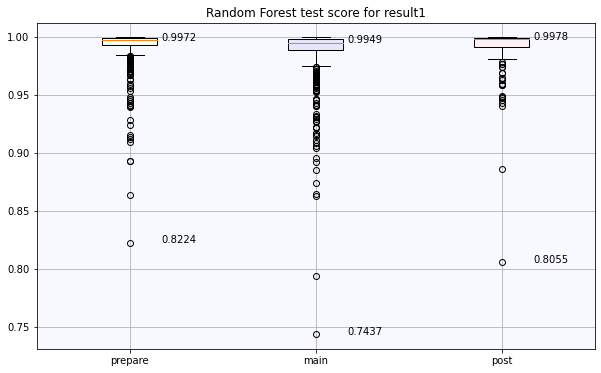

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))
plt.text(1.17,min(mett[5]),format(min(mett[5]),'.4f'))
plt.text(2.17,min(mett2[5]),format(min(mett2[5]),'.4f'))
plt.text(3.17,min(met3[5]),format(min(met3[5]),'.4f'))
# plt.text(1.17,np.mean(mett[5]),format(np.mean(mett[5]),'.4f'))
# plt.text(2.17,np.mean(mett2[5]),format(np.mean(mett2[5]),'.4f'))
# plt.text(3.17,np.mean(met3[5]),format(np.mean(met3[5]),'.4f'))


plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

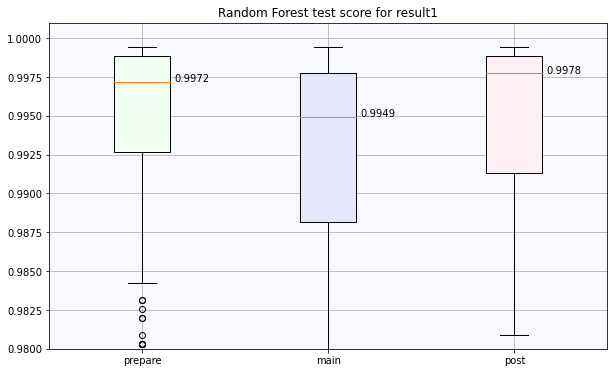

In [54]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([mett[5], mett2[5], met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])

plt.text(1.17,np.median(mett[5]),format(np.median(mett[5]),'.4f'))
plt.text(2.17,np.median(mett2[5]),format(np.median(mett2[5]),'.4f'))
plt.text(3.17,np.median(met3[5]),format(np.median(met3[5]),'.4f'))

ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()

# XGBOOST

In [55]:
from xgboost import XGBClassifier

## 준비운동

In [56]:
label = p
xgb_list=[]
xgb_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met[0].append(acc)
    xgb_met[1].append(precision)
    xgb_met[2].append(recall)
    xgb_met[3].append(f1)
    xgb_met[4].append(mcc)
    xgb_met[5].append(test_score)

    xgb_list.append(model)

In [57]:
print('Average acc: ', np.mean(xgb_met[0]))
print('Average precision: ', np.mean(xgb_met[1])) 
print('Average recall: ', np.mean(xgb_met[2]))  
print('Average f1: ', np.mean(xgb_met[3]))
print('Average mcc: ', np.mean(xgb_met[4])) 
print('Average test score: ', np.mean(xgb_met[5]))

Average acc:  0.9907646613158059
Average precision:  0.0036845462851370714
Average recall:  0.001336338279975639
Average f1:  0.0019471687247672616
Average mcc:  -0.0016868557293530106
Average test score:  0.9907646613158059


## 본운동

In [58]:
label = m
xgb_list2=[]
xgb_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], random_state=42, stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met2[0].append(acc)
    xgb_met2[1].append(precision)
    xgb_met2[2].append(recall)
    xgb_met2[3].append(f1)
    xgb_met2[4].append(mcc)
    xgb_met2[5].append(test_score)

    xgb_list2.append(model)

In [59]:
print('Average acc: ', np.mean(xgb_met2[0]))
print('Average precision: ', np.mean(xgb_met2[1])) 
print('Average recall: ', np.mean(xgb_met2[2]))  
print('Average f1: ', np.mean(xgb_met2[3]))
print('Average mcc: ', np.mean(xgb_met2[4])) 
print('Average test score: ', np.mean(xgb_met2[5]))

Average acc:  0.9871695829438116
Average precision:  0.008537260830574217
Average recall:  0.0027916592708256732
Average f1:  0.004158683725347951
Average mcc:  -0.0006051318729851848
Average test score:  0.9871695829438116


## 마무리운동

In [60]:
label = e
xgb_list3=[]
xgb_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], random_state=42, stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = XGBClassifier(random_state=222)
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    xgb_met3[0].append(acc)
    xgb_met3[1].append(precision)
    xgb_met3[2].append(recall)
    xgb_met3[3].append(f1)
    xgb_met3[4].append(mcc)
    xgb_met3[5].append(test_score)

    xgb_list3.append(model)

In [61]:
print('Average acc: ', np.mean(xgb_met3[0]))
print('Average precision: ', np.mean(xgb_met3[1])) 
print('Average recall: ', np.mean(xgb_met3[2]))  
print('Average f1: ', np.mean(xgb_met3[3]))
print('Average mcc: ', np.mean(xgb_met3[4])) 
print('Average test score: ', np.mean(xgb_met3[5]))

Average acc:  0.9911418658293114
Average precision:  0.01113043707402557
Average recall:  0.00406336374895247
Average f1:  0.005889626236110115
Average mcc:  0.002999320494023239
Average test score:  0.9911418658293114


## XGBOOST의 test score

In [62]:
print(min(xgb_met[5]), max(xgb_met[5]), np.mean(xgb_met[5]), np.median(xgb_met[5]))
print(min(xgb_met2[5]), max(xgb_met2[5]), np.mean(xgb_met2[5]), np.median(xgb_met2[5]))
print(min(xgb_met3[5]), max(xgb_met3[5]), np.mean(xgb_met3[5]), np.median(xgb_met3[5]))

0.8229342327150084 0.9994378864530635 0.9907646613158059 0.9971894322653176
0.7386172006745363 0.9994378864530635 0.9871695829438116 0.9955030916245081
0.806070826306914 0.9994378864530635 0.9911418658293114 0.9977515458122541


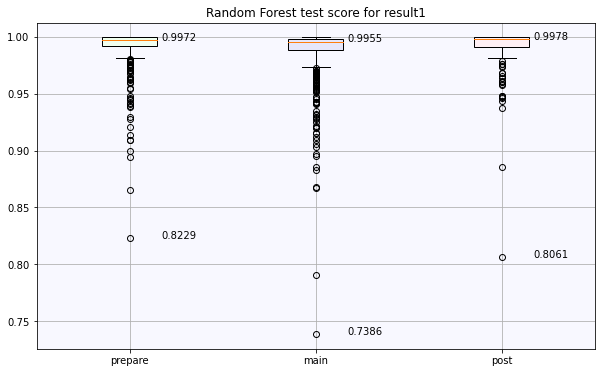

In [63]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))
plt.text(1.17,min(xgb_met[5]),format(min(xgb_met[5]),'.4f'))
plt.text(2.17,min(xgb_met2[5]),format(min(xgb_met2[5]),'.4f'))
plt.text(3.17,min(xgb_met3[5]),format(min(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

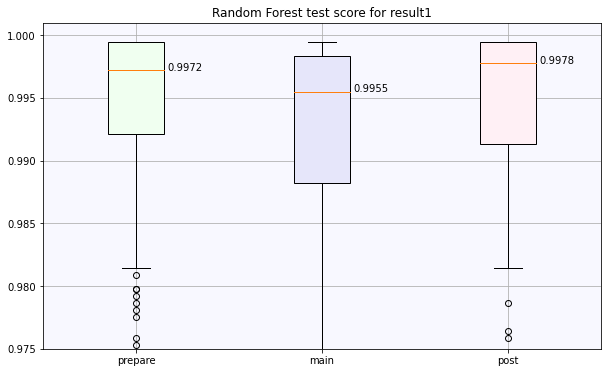

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([xgb_met[5], xgb_met2[5], xgb_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(xgb_met[5]),format(np.median(xgb_met[5]),'.4f'))
plt.text(2.17,np.median(xgb_met2[5]),format(np.median(xgb_met2[5]),'.4f'))
plt.text(3.17,np.median(xgb_met3[5]),format(np.median(xgb_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.975,1.001)
plt.grid(True)
plt.show()

# LGBM

In [65]:
import lightgbm as lgb

## 준비운동

In [66]:
label = p
lgbm_list=[]
lgbm_met=[[],[],[],[],[],[]]

for i in range(len(p.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[p.columns[i]], stratify=label[p.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met[0].append(acc)
    lgbm_met[1].append(precision)
    lgbm_met[2].append(recall)
    lgbm_met[3].append(f1)
    lgbm_met[4].append(mcc)
    lgbm_met[5].append(test_score)

    lgbm_list.append(model)

In [67]:
print('Average acc: ', np.mean(lgbm_met[0]))
print('Average precision: ', np.mean(lgbm_met[1])) 
print('Average recall: ', np.mean(lgbm_met[2]))  
print('Average f1: ', np.mean(lgbm_met[3]))
print('Average mcc: ', np.mean(lgbm_met[4])) 
print('Average test score: ', np.mean(lgbm_met[5]))

Average acc:  0.9891861429666081
Average precision:  0.004364202875563579
Average recall:  0.00127806293398598
Average f1:  0.001928078957315023
Average mcc:  -0.0014949900401847918
Average test score:  0.9891861429666081


## 본운동

In [68]:
label = m
lgbm_list2=[]
lgbm_met2=[[],[],[],[],[],[]]

for i in range(len(m.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[m.columns[i]], stratify=label[m.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met2[0].append(acc)
    lgbm_met2[1].append(precision)
    lgbm_met2[2].append(recall)
    lgbm_met2[3].append(f1)
    lgbm_met2[4].append(mcc)
    lgbm_met2[5].append(test_score)

    lgbm_list2.append(model)

In [69]:
print('Average acc: ', np.mean(lgbm_met2[0]))
print('Average precision: ', np.mean(lgbm_met2[1])) 
print('Average recall: ', np.mean(lgbm_met2[2]))  
print('Average f1: ', np.mean(lgbm_met2[3]))
print('Average mcc: ', np.mean(lgbm_met2[4])) 
print('Average test score: ', np.mean(lgbm_met2[5]))

Average acc:  0.9866154852763325
Average precision:  0.008003199257595095
Average recall:  0.004373796688878157
Average f1:  0.003759972009878502
Average mcc:  -0.000608904531797773
Average test score:  0.9866154852763325


## 마무리운동

In [70]:
label = e
lgbm_list3=[]
lgbm_met3=[[],[],[],[],[],[]]

for i in range(len(e.columns)):
    train_features, test_features, train_labels, test_labels = train_test_split(train, label[e.columns[i]], stratify=label[e.columns[i]])
    scaler = StandardScaler()  
    train_features = scaler.fit_transform(train_features)  
    test_features = scaler.transform(test_features)
    
    model = lgb.LGBMClassifier()
    model.fit(train_features, train_labels)
     
    test_predict =  model.predict(test_features)

    acc = accuracy_score(test_labels, test_predict)
    precision = precision_score(test_labels, test_predict)
    recall = recall_score(test_labels, test_predict)
    f1 = f1_score(test_labels, test_predict)
    mcc = matthews_corrcoef(test_labels, test_predict)

    test_score = model.score(test_features, test_labels)

    lgbm_met3[0].append(acc)
    lgbm_met3[1].append(precision)
    lgbm_met3[2].append(recall)
    lgbm_met3[3].append(f1)
    lgbm_met3[4].append(mcc)
    lgbm_met3[5].append(test_score)

    lgbm_list3.append(model)

In [71]:
print('Average acc: ', np.mean(lgbm_met3[0]))
print('Average precision: ', np.mean(lgbm_met3[1])) 
print('Average recall: ', np.mean(lgbm_met3[2]))  
print('Average f1: ', np.mean(lgbm_met3[3]))
print('Average mcc: ', np.mean(lgbm_met3[4])) 
print('Average test score: ', np.mean(lgbm_met3[5]))

Average acc:  0.9881042374500537
Average precision:  0.007985157477410425
Average recall:  0.012589167275042766
Average f1:  0.004169512811388495
Average mcc:  0.0015739518451938197
Average test score:  0.9881042374500537


## LGBM test score

In [72]:
print(min(lgbm_met[5]), max(lgbm_met[5]), np.mean(lgbm_met[5]), np.median(lgbm_met[5]))
print(min(lgbm_met2[5]), max(lgbm_met2[5]), np.mean(lgbm_met2[5]), np.median(lgbm_met2[5]))
print(min(lgbm_met3[5]), max(lgbm_met3[5]), np.mean(lgbm_met3[5]), np.median(lgbm_met3[5]))

0.8431703204047217 0.9994378864530635 0.9891861429666081 0.9966273187183811
0.7847105115233277 0.9994378864530635 0.9866154852763325 0.9949409780775716
0.8358628442945475 0.9994378864530635 0.9881042374500537 0.9971894322653176


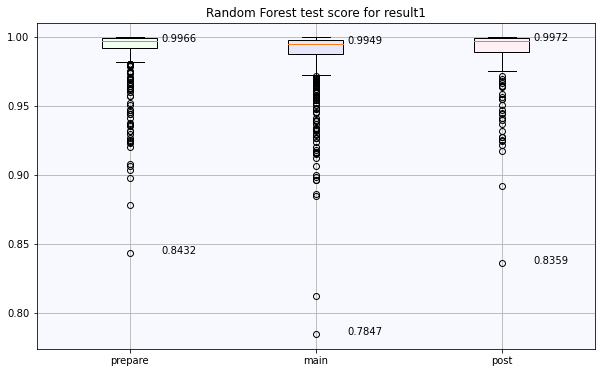

In [73]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))
plt.text(1.17,min(lgbm_met[5]),format(min(lgbm_met[5]),'.4f'))
plt.text(2.17,min(lgbm_met2[5]),format(min(lgbm_met2[5]),'.4f'))
plt.text(3.17,min(lgbm_met3[5]),format(min(lgbm_met3[5]),'.4f'))

plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
plt.grid(True)
plt.show()

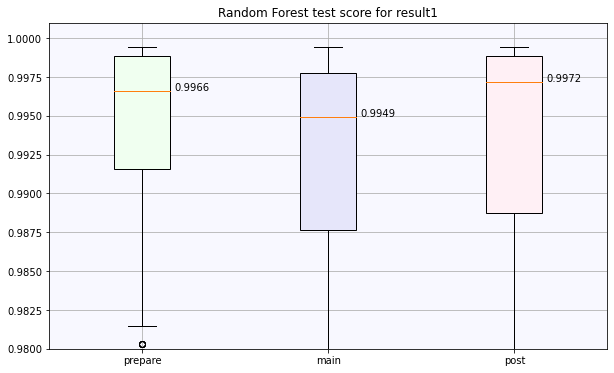

In [74]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(facecolor='ghostwhite')
bp = ax.boxplot([lgbm_met[5], lgbm_met2[5], lgbm_met3[5]], patch_artist=True)
colors=['honeydew','lavender','lavenderblush']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.text(1.17,np.median(lgbm_met[5]),format(np.median(lgbm_met[5]),'.4f'))
plt.text(2.17,np.median(lgbm_met2[5]),format(np.median(lgbm_met2[5]),'.4f'))
plt.text(3.17,np.median(lgbm_met3[5]),format(np.median(lgbm_met3[5]),'.4f'))


plt.title('Random Forest test score for result1')
plt.xticks([1,2,3],['prepare','main','post'])
ax.set_ylim(0.98,1.001)
plt.grid(True)
plt.show()